# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project showcases my learning from the Advanced Google Data Analytics course. I will analyse a dataset and build  a predictive model that can provide insights to the Human Resources (HR) department of a large (fictional) consulting firm.

Upon completion, I will have two main deliverables: One is the code notebook provided here, and the other a brief one page summary of this project for stakeholders in Salifort Motors. A model will be built to predict whether or not an employee will leave the company. Additionally, model evaluation and interpretation, accompanying data visualisations, as well as ethical considerations, methodology and resources used will also be reported. 



# **PACE stages**


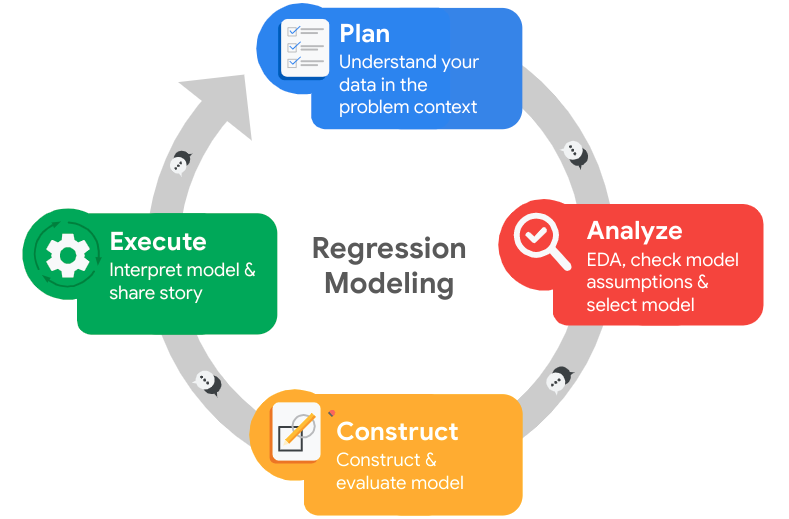

## **Pace: Plan**

### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. In this scenario, they have asked a data analyst to provide data-driven suggestions based on their understanding of the data. They have the following question: 

* ***what’s likely to make the employee leave the company?***

This projectg will analyse the data collected by the HR department and build a model that predicts whether or not an employee will leave the company. This may enable to identify factors that contribute to employee exit. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Initial exploration of the dataset

The analyst has been provided with a dataset containing 15,000 rows and 10 columns for the variables listed below.
The dataset has been sourced from  [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

### Step 1. Import packages and load in the data

*   Import packages
*   Load dataset



#### Import packages

In [1]:
# Import packages

# Data manipulation packages
import numpy as np
import pandas as pd

# Data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for preprocessing, modelling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* Most of the data is already numeric. 
* There are two categorical data columns that will need to be encoded: `Department` and `Salary`.
* There are no null values in the data
* Column namings are inconsistent

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include="all")


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

Column names are standardised so that they are all in `snake_case`, correctly spelled and more concise where applicable. 

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={"average_montly_hours" : "average_monthly_hours",
                          "time_spend_company" : "tenure",
                          "Work_accident" : "work_accident", 
                          "Department" :"department"})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

As predicted earlier, there are no missing values in the data. 

### Check duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

There are $3008$ duplicated rows in the dataset. This is about $20\%$ of the data. It is very unlikely that two employees will report the exact same numbers across all of the variables in this dataset. Therefore, these duplicates will be removed. 

In [9]:
# Inspect some rows containing duplicates 
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable 
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe 
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

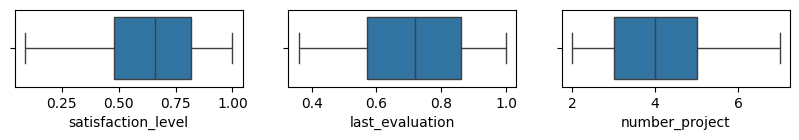

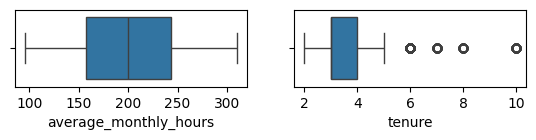

In [11]:
# Create boxplots to determine if there are any outliers
fig, axes = plt.subplots(1,3, figsize=(10,1))
sns.boxplot(x=df1['satisfaction_level'], ax=axes[0])
sns.boxplot(x=df1['last_evaluation'], ax=axes[1])
sns.boxplot(x=df1['number_project'], ax=axes[2])
plt.show()

fig, axes = plt.subplots(1,2, figsize=(6.6,1))
sns.boxplot(x=df1['average_monthly_hours'], ax=axes[0])
sns.boxplot(x=df1['tenure'], ax=axes[1])
plt.show()

By visual inspection, it appears that there are several outlier values in the tenure column. Their relative frequency can be visualised with a histogram. 

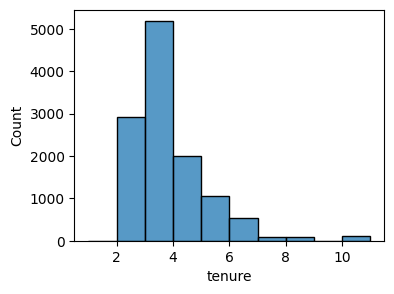

In [106]:
# Plot hist
plt.figure(figsize=(4,3))
sns.histplot(x=df1['tenure'], binwidth=1, binrange=(1,11));

In [38]:
# Determine the number of rows containing outliers

def find_outlier_rows(df): 
    '''
    takes as an argument a df or a column within a df
    computes the 25th percentile (q1), the 75% percentile (q3) and the interquartile range (iqr)
    returns the rows which have outliers
    '''
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    outliers_row = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return outliers_row

# Return how many outlier rows there are in the dataset
find_outlier_rows(df1['tenure']).shape[0]

824

It looks like the `tenure` column contains some outliers. As some of the models implemented below are not robust to outliers, these will have to be inspected and removal considered.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Understand how many employees left and what percentage of all employees this figure represents.

In [40]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts().reset_index()

,left,count
0,0,10000
1,1,1991


In [45]:
# Get proportions of people who left vs. stayed
df1['left'].value_counts(normalize=True).reset_index()

,left,proportion
0,0,0.833959
1,1,0.166041


~$~17\%$ of employees in the dataset have left the company. 

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

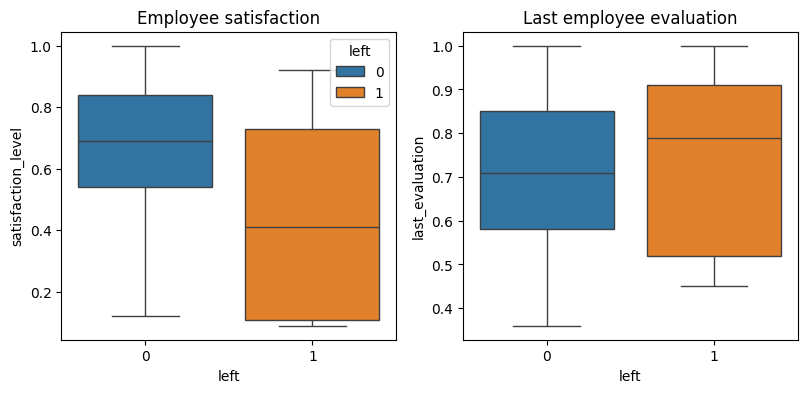

In [109]:
# Plot satisfaction level and evaluation for churned vs retained employees

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1,2, figsize=(9.5,4))

# Plot 1
sns.boxplot(data=df1,
            x='left',
            y='satisfaction_level',
            hue ='left',
            ax=axes[0])
sns.move_legend(axes[0], "upper right")
axes[0].set_title('Employee satisfaction')

# Plot 2
sns.boxplot(data=df1, x='left', 
            y='last_evaluation',
            hue ='left',
            legend=False,
            ax=axes[1])
axes[1].set_title('Last employee evaluation')
plt.show()


Employees who churned appear to have considerably lower reported satisfaction levels than those who were retained. 

The grid plot looks rather crowded so individual plots will help to inspect the data

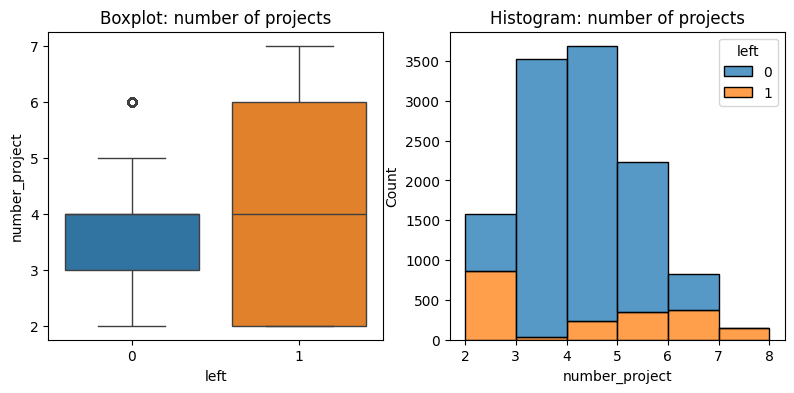

In [130]:
# Explore number of projects contributed to vs employee churn.
fig, axes = plt.subplots(1,2, figsize=(9.5,4))

# Plot 1
sns.boxplot(data=df1,
            x='left',
            y='number_project',
            hue='left',
            legend=False,
            ax=axes[0])
axes[0].set_title('Boxplot: number of projects')

# Plot 2
sns.histplot(data=df1,
            x='number_project',
            hue='left',
            binwidth=1,
            binrange=(2,8),
            multiple="stack",
            ax=axes[1])
axes[1].set_title('Histogram: number of projects')
plt.show()

From this figure, it looks like half of those who contributed to only 2 projects, or to 6 or more projects, churned. It seems that there is an optimal number of projects which is associated with greater employee retention. This will have to be explored further. 

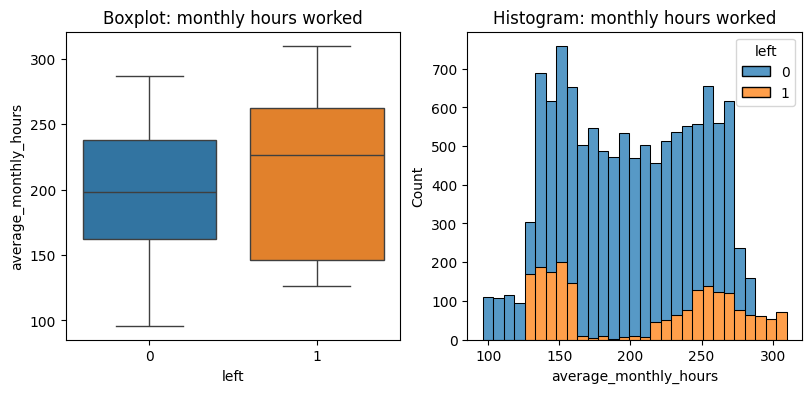

In [129]:
# Explore average monthly hours
fig, axes = plt.subplots(1,2, figsize=(9.5,4))

sns.boxplot(data=df1,
            x='left',
            y='average_monthly_hours',
            hue='left',
            legend=False,
            ax=axes[0])
axes[0].set_title('Boxplot: monthly hours worked')

sns.histplot(data=df1,
            x='average_monthly_hours',
            hue='left',
            multiple="stack",
            ax=axes[1])
axes[1].set_title('Histogram: monthly hours worked')
plt.show()


Employees who churned appeared to be stratified in two distinct categories, those who work fewer than the average of 200 hours, and those who worked more hours. It will be important to explore further the relationship between hours worked and employee churn.  

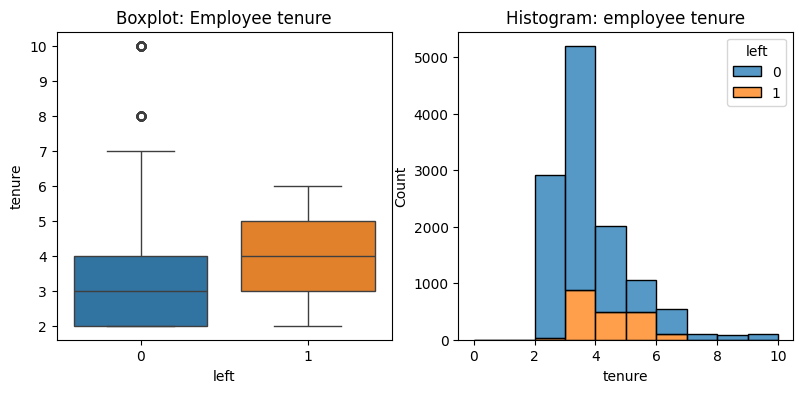

In [136]:
# Explore effect of tenure on employee churn
fig, axes = plt.subplots(1,2, figsize=(9.5,4))

sns.boxplot(data=df1,
            x='left',
            y='tenure',
            hue='left',
            legend=False,
            ax=axes[0])
axes[0].set_title('Boxplot: Employee tenure')

sns.histplot(data=df1,
            x='tenure',
            hue='left',
            multiple="stack",
            binwidth=1,
            binrange=(0,10),
            ax=axes[1])
axes[1].set_title('Histogram: employee tenure')
plt.show()

Detectable employee churn seems to occur after 3 years in employment. From visual inspection of the histogram, it looks like once company tenure reaches 5 years, half of the tenured employees are leaving. 

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###


In [20]:
# Create a plot as needed
### YOUR CODE HERE ###


In [21]:
# Create a plot as needed
### YOUR CODE HERE ###


In [22]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [23]:
### YOUR CODE HERE ###


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.